In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('student_performance_dataset.csv')
data

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


data["Pass_Fail"] = label_encoder.fit_transform(data["Pass_Fail"])
data

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,1
1,S136,Male,16,78.222927,73,PhD,No,No,50,0
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,0
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,1
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,1
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,0
704,S301,Male,35,60.278990,83,Masters,No,No,62,1
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,0
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=data.drop(["Student_ID","Gender","Parental_Education_Level","Extracurricular_Activities","Pass_Fail","Internet_Access_at_Home"],axis=1)
y=data["Pass_Fail"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
522,38,79.415334,94,63
24,20,89.075724,92,62
480,35,74.187747,88,69
314,13,95.534310,56,60
239,39,61.660821,98,63


In [8]:
y_train.head()

522    1
24     1
480    1
314    1
239    1
Name: Pass_Fail, dtype: int32

In [9]:
X_test.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
120,14,54.335261,61,50
247,31,87.854060,88,65
324,35,90.252233,82,68
204,23,85.702960,98,60
603,39,89.504232,67,64


In [10]:
y_test.head()

120    0
247    1
324    1
204    1
603    1
Name: Pass_Fail, dtype: int32

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
ypre = model.predict(X_test)
print(ypre)
print(y_test)

[0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0
 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1]
120    0
247    1
324    1
204    1
603    1
      ..
41     0
108    0
582    0
56     1
432    1
Name: Pass_Fail, Length: 142, dtype: int32


In [17]:
model.predict([[89,78,56,45,]])

C:\Users\DELL\OneDrive\Attachments\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [19]:
model.predict([[14,54,61,50]])

C:\Users\DELL\OneDrive\Attachments\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [21]:
model.predict([[31,68,86,63]])

C:\Users\DELL\OneDrive\Attachments\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

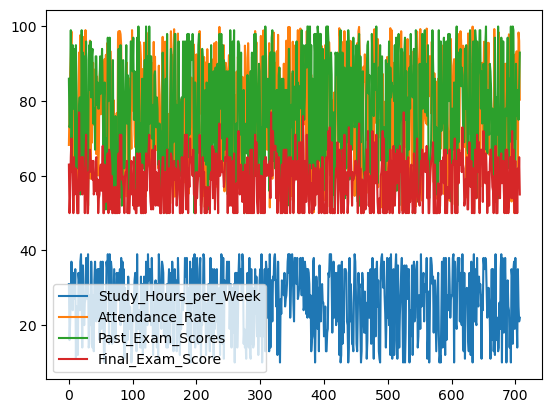

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('student_performance_dataset.csv')

df.plot()

plt.show()

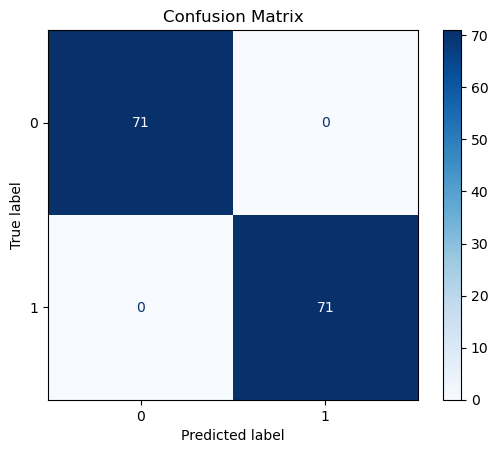

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Generate confusion matrix
cm = confusion_matrix( y_test,ypre)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Change labels as needed
disp.plot(cmap=plt.cm.Blues)  # You can choose another colormap if desired

# Customize plot if needed
plt.title("Confusion Matrix")
plt.show()


In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, ypre)
accuracy

1.0

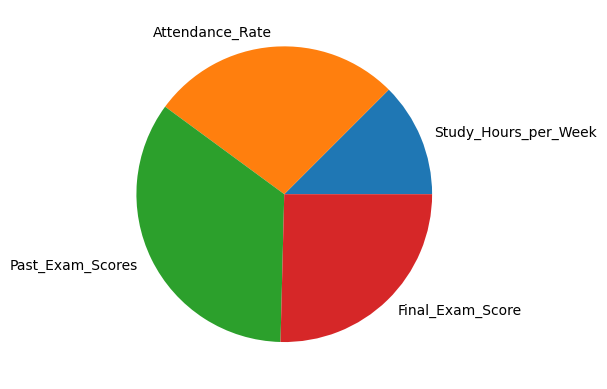

In [32]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([31, 68, 86, 63])
mylabels = ["Study_Hours_per_Week", "Attendance_Rate", "Past_Exam_Scores", "Final_Exam_Score"]

plt.pie(y, labels = mylabels)
plt.show()